# Aufgabe 1

Implementieren Sie die Gauß-Quadraturformeln mit s = 2,3,4 Stufen und erstellen Sie für die Funktionen aus Aufgabe 1 vom letzten Übungsblatt ein Genauigkeit-Aufwandsdiagramm.

Bei der Gauss Quadratur ergeben sich die verschiedenen Knoten durch die Nullstellen der Legendre Polynome es gilt


$c_i := \frac{1}{2}(1+ \gamma_i)$ für ein $P_s(x)$ im Intervall (-1,1)

Man benötigt eine Transformation auf (-1,1) für die Quadrature

Sei  $x = mt + c$ dann ist

+ $x = a; t = -1$
+ $x = b, t = 1$
+ $a = -m + c$
+ $b = m +c$

Damit $m = \frac{b-a}{2}$ und $c = \frac{a + b}{2}$

$x = \frac{b-a}{2}t + \frac{a+b}{2}$, $dx =\frac{b-a}{2}dt$

$\int_a^b f(x)dx \to \int_{-1}^1 f(\frac{b-a}{2}t + \frac{a+b}{2})\frac{b-a}{2} dt \to \frac{h}{2} \int_{-1}^1 f(\frac{h}{2}t + \frac{a+b}{2})dt$ mit $h = b-a$

In [7]:
import numpy as np
"""
Note on np.polynomial.legendre.leggaus(deg):

Computes sample points and weights for Gauss-Legendre quadrature

Parameters:
    deg: int
        Number of sample points and weights

Returns:
    x: ndarray
        Array of sample point
    y:
        Array of weights
"""

def gauss_quad(f,a,b,s,N):
    """
    Arguments:
        f: func
            function we want to integrate
        a: int
            lower boundary of integration
        b: int
            upper boundary of integration
        s: int
            Order of the Gauss Quadrature
        N: int
            Stepsize
    """
    
    result = 0

    intervals = np.linspace(a,b,N+1)

    for i in range(N):
        start = intervals[i]
        end = intervals[i+1]

        half_point = (end-start)/2
        mid_point = (start+end)/2
        x,w = np.polynomial.legendre.leggauss(s)
    
        for i in range(s):
            result += w[i]*f(half_point*x[i]+mid_point)
    result *= half_point
    return result

# Function from last weeks exercise sheet

def f(x):
    return np.cos(x)*np.exp(np.sin(x))


analytical_val = np.exp(np.sin(3))-1
print("Analytical value of Integral", analytical_val)

print("Value of Gaussian Quadrature:",gauss_quad(f,0,3,1,2))


Analytical value of Integral 0.15156283651453495
Value of Gaussian Quadrature: 0.1183914181025949


In [14]:
# In Case we want the normal gauss-quad

def gaus_quad_new(f,a,b,N,s): 
    x_vals = np.linspace(a,b,N)
    nodes,b_i =  np.polynomial.legendre.leggauss(s)
    
    c_i = []
    for node in nodes:
        c_i.append(0.5 * (1 + node))   

    h_vals = np.diff(x_vals)
    interval_result = []
    for j in range(0,N-1):
        first_sum = []
        for i in range(0,s):
            result= (b_i[i]/2) * f(x_vals[j]+c_i[i]*h_vals[j])
            first_sum.append(result)
        interval_result.append((h_vals[j]*np.sum(first_sum)))
        
        #interval_result.append(result)
    return np.sum(interval_result)

print(gaus_quad_new(f,0,3,3,3))

0.15092943331131736


In [9]:
# Plot accuracy agains step size
import matplotlib.pyplot as plt
"""
np.logspace()

Returns numbers spaced evenly on a log scale
"""

n = np.array([10,1000,10000,100000])
err_g_quad2, err_g_quad3, err_g_quad4 = np.zeros(len(n)), np.zeros(len(n)), np.zeros(len(n))

for i in range(0, len(n)):
    err_g_quad2[i] = abs(gauss_quad(f,0,3,2,int(n[i]))-analytical_val)
    err_g_quad3[i] = abs(gauss_quad(f,0,3,3,int(n[i]))-analytical_val)
    err_g_quad4[i] = abs(gauss_quad(f,0,3,4,int(n[i]))-analytical_val)

plt.plot(err_g_quad2, 2*n, color = "blue", label= "gauss s2")
plt.plot(err_g_quad3, 3*n, color="orange",label="gauss s3")
plt.plot(err_g_quad4, 4*n, color="green", label="gauss s4")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

KeyboardInterrupt: 

## Aufgabe 2

Erstellen Sie ein Genauigkeit-Aufwandsdiagramm für die Integrale

$\int_{0}^2\frac{cos(x)}{\sqrt(x)}dx$ und $\int_0^2 \sqrt{x}sin(x)dx$


Zuerst berechnen wir also die Integrale mit der Gauß Quadraturformel mit $s=2,3$ mit einer großen Schrittweise

Dazu verwende ich die Implementation von oben

In [4]:
def f1(x):
    return (np.cos(x))/np.sqrt(x)

def f2(x):
    return np.sqrt(x) * np.sin(x)

# Calculate both Functions using Gauss-Quad from above

step_size = 10000

int_f1_gauss_s2 = gauss_quad(f1,0,2,2,step_size)
int_f1_gauss_s3 = gauss_quad(f1,0,2,3,step_size)
int_f2_gauss_s2 = gauss_quad(f2,0,2,2,step_size)
int_f2_gauss_s3 = gauss_quad(f2,0,2,3,step_size)

print(f"Gauss-Quad s=2, Stepsize = {step_size}, int f1 = {int_f1_gauss_s2}")
print(f"Gauss-Quad s=3, Stepsize = {step_size}, int f1 = {int_f1_gauss_s3}")
print(f"Gauss-Quad s=2, Stepsize = {step_size}, int f2 = {int_f2_gauss_s2}")
print(f"Gauss-Quad s=3, Stepsize = {step_size}, int f2 = {int_f2_gauss_s3} ")

Gauss-Quad s=2, Stepsize = 10000, int f1 = 1.8833045376314013
Gauss-Quad s=3, Stepsize = 10000, int f1 = 1.8847256063641356
Gauss-Quad s=2, Stepsize = 10000, int f2 = 1.532645017029978
Gauss-Quad s=3, Stepsize = 10000, int f2 = 1.5326450170306136 


Nun stellen wir hierfür ein Genauigkeits aufwand Diagramm auf

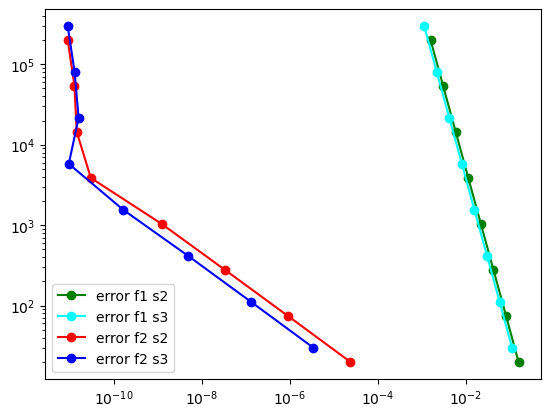

In [5]:
from scipy.integrate import quad

"""
quad(func, a,b)

Integrate func from a to b (possibly infinite interval) 
using a technique from the Fortran library QUADPACK.
"""

super_accurate_int_f1, err_f1 = quad(f1,0,2)
super_accurate_int_f2, err_f2 = quad(f2,0,2)


step_size = np.logspace(1,5,8)

error_gauss_s2_f1= np.zeros(len(step_size))
error_gauss_s3_f1= np.zeros(len(step_size))
error_gauss_s2_f2= np.zeros(len(step_size))
error_gauss_s3_f2= np.zeros(len(step_size))

for i in range(0,len(step_size)):
    error_gauss_s2_f1[i] = abs(gauss_quad(f1,0,2,2,int(step_size[i]))-super_accurate_int_f1)
    error_gauss_s3_f1[i] = abs(gauss_quad(f1,0,2,3,int(step_size[i]))-super_accurate_int_f1)
    error_gauss_s2_f2[i] = abs(gauss_quad(f2,0,2,2,int(step_size[i]))-super_accurate_int_f2)
    error_gauss_s3_f2[i] = abs(gauss_quad(f2,0,2,3,int(step_size[i]))-super_accurate_int_f2)

plt.plot(error_gauss_s2_f1, 2*step_size, "-o",color="green", label="error f1 s2")
plt.plot(error_gauss_s3_f1, 3*step_size, "-o",color="cyan", label="error f1 s3")
plt.plot(error_gauss_s2_f2, 2*step_size, "-o",color="red", label="error f2 s2")
plt.plot(error_gauss_s3_f2, 3*step_size, "-o",color="blue", label="error f2 s3")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()


f1 hat eine Singularität in dem Integranten

f2 hat eine Singularität in den Ableitungen zbs

$-\frac{\left(4x^{2} + 1\right) \sin\left(x\right) - 4x \cos\left(x\right)}{4x^{\frac{3}{2}}}$

Es kommt also zu Ordnungsreduktion!

Damit verwenden wir hier jetzt einfach Variablentransformationen

$x = u^2$ damit $dx = 2udu$

erhält:

+ $\int_0^b \frac{f(x)}{\sqrt(x)}dx = 2 \int_0^{\sqrt{b}} f(u^2)du$
+ $\int_0^b \sqrt{x}\sin x dx = 2 \int_0^{\sqrt{b}} u^2 \sin(u^2)du$ 

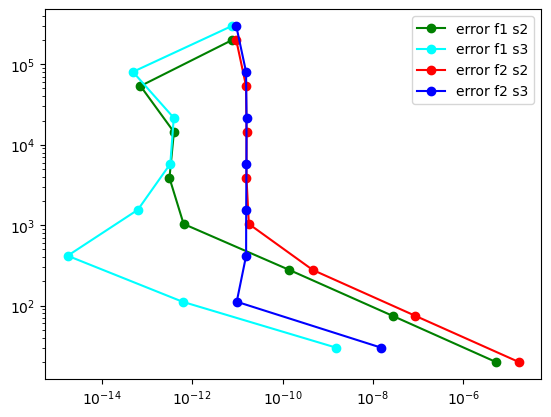

In [6]:
def f1_sub(x):
    return 2 * (np.cos(x**2))

def f2_sub(x):
    return 2* (np.sin(x**2))*(x**2)

error_gauss_s2_f1= np.zeros(len(step_size))
error_gauss_s3_f1= np.zeros(len(step_size))
error_gauss_s2_f2= np.zeros(len(step_size))
error_gauss_s3_f2= np.zeros(len(step_size))


for i in range(0,len(step_size)):
    error_gauss_s2_f1[i] = abs(gauss_quad(f1_sub,0,np.sqrt(2),2,int(step_size[i]))-super_accurate_int_f1)
    error_gauss_s3_f1[i] = abs(gauss_quad(f1_sub,0,np.sqrt(2),3,int(step_size[i]))-super_accurate_int_f1)
    error_gauss_s2_f2[i] = abs(gauss_quad(f2_sub,0,np.sqrt(2),2,int(step_size[i]))-super_accurate_int_f2)
    error_gauss_s3_f2[i] = abs(gauss_quad(f2_sub,0,np.sqrt(2),3,int(step_size[i]))-super_accurate_int_f2)

plt.plot(error_gauss_s2_f1, 2*step_size, "-o",color="green", label="error f1 s2")
plt.plot(error_gauss_s3_f1, 3*step_size, "-o",color="cyan", label="error f1 s3")
plt.plot(error_gauss_s2_f2, 2*step_size, "-o",color="red", label="error f2 s2")
plt.plot(error_gauss_s3_f2, 3*step_size, "-o",color="blue", label="error f2 s3")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

